In [24]:
import numpy as np
from PIL import Image

In [25]:
img = Image.open('data/dogs/dog.1.jpg')
M = np.asarray(img)

In [26]:
def histograms(M):
    total_pixels = M.shape[0] * M.shape[1]

    red_hist = [0] * 256
    green_hist = [0] * 256
    blue_hist = [0] * 256

    for i in range(3):
        for j in M[:, :, i]:
            for k in j:
                if i == 0:
                    red_hist[k] += 1
                elif i == 1:
                    green_hist[k] += 1
                else:
                    blue_hist[k] += 1
    red_prob_hist = [count / total_pixels for count in red_hist]
    green_prob_hist = [count / total_pixels for count in green_hist]
    blue_prob_hist = [count / total_pixels for count in blue_hist]

    return red_prob_hist, green_prob_hist, blue_prob_hist

red_histogram, green_histogram, blue_histogram = histograms(M)
print(red_histogram, green_histogram, blue_histogram, sep='\n')

[0.004682147168955648, 0.007256102418905088, 0.0054972329981063045, 0.002708781477327744, 0.001532116220208, 0.001268592230332224, 0.0010969952136689282, 0.00082734275891232, 0.000907012802363136, 0.0007905719696273281, 0.000931526661886464, 0.0006680026720106881, 0.0005822041636790401, 0.000557690304155712, 0.0005638187690365441, 0.0006863880666531841, 0.0007783150398656641, 0.001029582099979776, 0.001054095959503104, 0.0011582798624772482, 0.0012869776249747201, 0.001391161527948864, 0.001538244685088832, 0.0018569248588920961, 0.0017404840261562881, 0.001752740955917952, 0.002004008016032064, 0.001863053323772928, 0.0015259877553271681, 0.0015872724041354881, 0.0016363001231821442, 0.0017711263505604481, 0.0017895117452029442, 0.0018569248588920961, 0.001893695648177088, 0.0021388342434103683, 0.001985622621389568, 0.0017098417017521281, 0.001832410999368768, 0.0017956402100837762, 0.0019427233672237442, 0.0017588694207987842, 0.0019672372267470722, 0.001863053323772928, 0.001850796

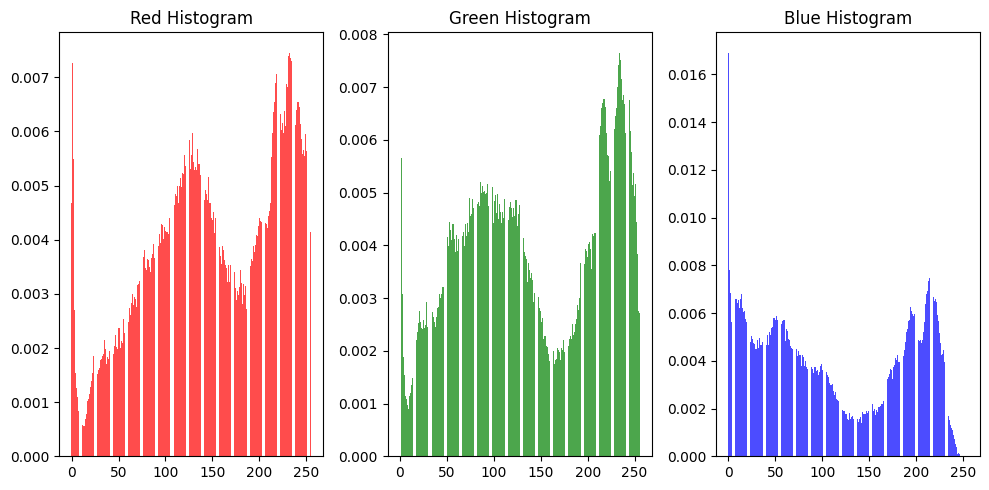

In [27]:
import matplotlib.pyplot as plt
intensity_levels = range(256)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(intensity_levels, red_histogram, color='red', alpha=0.7)
plt.title('Red Histogram')

plt.subplot(1, 3, 2)
plt.bar(intensity_levels, green_histogram, color='green', alpha=0.7)
plt.title('Green Histogram')

plt.subplot(1, 3, 3)
plt.bar(intensity_levels, blue_histogram, color='blue', alpha=0.7)
plt.title('Blue Histogram')

plt.tight_layout()
plt.show()

In [28]:
import numpy as np
from scipy.stats import skew, kurtosis

def featurize(hist):
    vec = []
    sum = 0
    for i in range(len(hist)):
        sum += hist[i]
        while int(sum*10) > len(vec):
            vec.append(i)

    if len(vec) == 9:
        vec.append(255)
    
    mn = np.mean(vec)
    var = np.var(vec)
    skw = skew(vec)
    kurt = kurtosis(vec)
    feature_vec = [mn, var, skw, kurt]
    return feature_vec

# print(featurize(blue_histogram))

In [29]:
import os

def get_image_filenames(folder_path):
    files = os.listdir(folder_path)
    image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
    return image_files


cats_filenames = get_image_filenames('data/cats/')
dogs_filenames = get_image_filenames('data/dogs/')
horses_filenames = get_image_filenames('data/horses/')
humans_filenames = get_image_filenames('data/human/')

In [30]:
print(cats_filenames, dogs_filenames, horses_filenames, humans_filenames, sep = '\n')

['cat.1.jpg', 'cat.138.jpg', 'cat.104.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.105.jpg', 'cat.139.jpg', 'cat.113.jpg', 'cat.107.jpg', 'cat.106.jpg', 'cat.112.jpg', 'cat.116.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.117.jpg', 'cat.101.jpg', 'cat.115.jpg', 'cat.129.jpg', 'cat.128.jpg', 'cat.114.jpg', 'cat.100.jpg', 'cat.119.jpg', 'cat.125.jpg', 'cat.131.jpg', 'cat.130.jpg', 'cat.124.jpg', 'cat.118.jpg', 'cat.132.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.133.jpg', 'cat.137.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.136.jpg', 'cat.120.jpg', 'cat.134.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.135.jpg', 'cat.121.jpg', 'cat.11.jpg', 'cat.10.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.143.jpg', 'cat.14.jpg', 'cat.142.jpg']
['dog.104.jpg', 'dog.110.jpg', 'dog.138.jpg', 'dog.1.jpg', 'dog.139.jpg', 'dog.111.jpg', 'dog.105.jpg', 'dog.113.jpg', 'dog.107.jpg', 'dog.106.jpg', 'dog.112.jpg', 'dog.116.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.117.jpg', 'dog.129.jpg', 'dog.101.jpg', 'd

In [31]:
import csv

csv_file_path = "features.csv"

# Write feature vectors to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(["Red_Mean", "Red_Variance", "Red_Skewness", "Red_Kurtosis",
                     "Green_Mean", "Green_Variance", "Green_Skewness", "Green_Kurtosis",
                     "Blue_Mean", "Blue_Variance", "Blue_Skewness", "Blue_Kurtosis",
                     "Category"])

In [32]:
import csv

# CSV file path
csv_file_path = "features.csv"

# Open CSV file for writing
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(["Red_Mean", "Red_Variance", "Red_Skewness", "Red_Kurtosis",
                     "Green_Mean", "Green_Variance", "Green_Skewness", "Green_Kurtosis",
                     "Blue_Mean", "Blue_Variance", "Blue_Skewness", "Blue_Kurtosis",
                     "Category"])

    # Loop through each cat image
    for img in cats_filenames:
        file_name = 'data/cats/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["cats"]
        
        # Write the row to the CSV file
        writer.writerow(row)
    
    for img in dogs_filenames:
        file_name = 'data/dogs/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["dogs"]
        
        # Write the row to the CSV file
        writer.writerow(row)

    for img in horses_filenames:
        file_name = 'data/horses/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["horses"]
        
        # Write the row to the CSV file
        writer.writerow(row)

    for img in humans_filenames:
        file_name = 'data/human/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["humans"]
        
        # Write the row to the CSV file
        writer.writerow(row)

print("Feature vectors written to", csv_file_path)

Feature vectors written to features.csv


In [33]:
import csv
csv_file_path = 'features.csv'

data = []
with open(csv_file_path, mode='r', newline='') as file:
    reader = csv.reader(file)

    next(reader)
    
    for row in reader:
        data_without_category = row[:-1]
        
        data.append(data_without_category)
        # print(data_without_category)

print(data)


[['94.7', '3883.4100000000008', '1.4972439703987626', '1.6205942024538276', '85.3', '3873.0099999999993', '1.86596636207155', '2.676102590732768', '85.1', '3908.8900000000003', '1.833387589273271', '2.6164488231204563'], ['153.3', '3746.21', '0.1165035349995881', '-1.3851793436863769', '104.0', '4261.0', '1.3262807540892687', '0.37542349491942684', '97.1', '4317.29', '1.3316301815685565', '0.3699241072776176'], ['129.6', '2915.6400000000003', '0.9188285844037907', '0.45658164376663324', '117.4', '2727.84', '0.899083863960263', '0.4595843465110607', '114.1', '3323.29', '1.1822850437629335', '0.9423288726518413'], ['162.5', '1656.45', '0.5772412386582111', '0.6012852100408921', '85.9', '4576.889999999999', '1.1830703520962738', '0.32372654213908714', '100.6', '3895.8399999999992', '1.4546204443141755', '0.9952050016880412'], ['124.7', '4814.610000000001', '0.29614727680551967', '-0.85073892672236', '119.6', '4888.24', '0.5436491165864339', '-0.9230995979008716', '114.2', '5579.9600000000

In [43]:
def euclidean_distance(vec1, vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    
    distance = np.linalg.norm(vec1 - vec2, axis = 1)
    
    return distance

def preprocess_data(data):
    preprocessed_data = []
    for vec_str in data:
        vec = [float(x) for x in vec_str.split(' ')]
        preprocessed_data.append(vec)
    return preprocessed_data

In [52]:
test_filenames = get_image_filenames('data/test/')

for img in test_filenames:
    file_name = 'data/test/' + img
    image = Image.open(file_name)
    M = np.asarray(image)
    red_histogram, green_histogram, blue_histogram = histograms(M)
    red_features = featurize(red_histogram)
    green_features = featurize(green_histogram)
    blue_features = featurize(blue_histogram)
    feature_vec = red_features + green_features + blue_features
    
    result = []
    i = 1
    for vec in data:
        vec = preprocess_data(vec)
        dist = euclidean_distance(vec, feature_vec)
        total_dist = np.sum(dist)
        # print(total_dist)
        result.append([total_dist, i])
        i += 1
    # print(result)

    result = sorted(result, key=lambda x: x[0])
    print(result)


    pred = {"cat":0, "dog":0, "horse":0, "human":0}
    for i in range(40):
        val = result[i][1]
        if val<51:
            pred["cat"]+=1
        elif val<101:
            pred["dog"]+=1
        elif val<151:
            pred["horse"]+=1
        else:
            pred["human"]+=1
        
    print(pred)

    # print(red_features, green_features, blue_features, sep='\n')

[[84867.57680885427, 132], [85069.10575338616, 111], [85069.10575338616, 114], [85188.15143074848, 149], [85417.49081368036, 32], [85953.50210109935, 25], [85986.17389292369, 116], [86097.57868057898, 92], [86465.95139435935, 8], [86577.44612934398, 146], [86779.39338358153, 45], [86840.76848581499, 152], [86840.76848581499, 167], [87255.63705327874, 156], [87255.63705327874, 165], [88595.50518785324, 79], [88638.3979607129, 50], [88712.57772999669, 126], [89247.80524338153, 119], [89461.74057026982, 122], [89520.13056367512, 10], [89520.48047240717, 57], [89622.88755774242, 182], [89763.23597501605, 145], [89892.03209315635, 140], [90147.4545618732, 78], [90197.84573751943, 31], [90249.2131292193, 52], [90254.17115712144, 82], [90632.4542189749, 88], [90793.32513239307, 58], [90880.77789715509, 109], [91464.55557374739, 120], [92290.08617284075, 22], [92456.54583827367, 33], [92771.66176920469, 124], [93041.72534510186, 189], [93183.00966284232, 85], [93630.07579020834, 11], [93645.03

In [45]:
print(data)

[['94.7', '3883.4100000000008', '1.4972439703987626', '1.6205942024538276', '85.3', '3873.0099999999993', '1.86596636207155', '2.676102590732768', '85.1', '3908.8900000000003', '1.833387589273271', '2.6164488231204563'], ['153.3', '3746.21', '0.1165035349995881', '-1.3851793436863769', '104.0', '4261.0', '1.3262807540892687', '0.37542349491942684', '97.1', '4317.29', '1.3316301815685565', '0.3699241072776176'], ['129.6', '2915.6400000000003', '0.9188285844037907', '0.45658164376663324', '117.4', '2727.84', '0.899083863960263', '0.4595843465110607', '114.1', '3323.29', '1.1822850437629335', '0.9423288726518413'], ['162.5', '1656.45', '0.5772412386582111', '0.6012852100408921', '85.9', '4576.889999999999', '1.1830703520962738', '0.32372654213908714', '100.6', '3895.8399999999992', '1.4546204443141755', '0.9952050016880412'], ['124.7', '4814.610000000001', '0.29614727680551967', '-0.85073892672236', '119.6', '4888.24', '0.5436491165864339', '-0.9230995979008716', '114.2', '5579.9600000000